# Bitcoin Volatility Analysis - Data Exploration

This notebook explores Bitcoin price data and market events.

## Objectives
- Load and examine the raw data
- Explore Bitcoin price patterns
- Analyze volatility characteristics
- Visualize key market events


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('default')
sns.set_palette("husl")

project_root = Path('..')
print(f"Project root: {project_root.absolute()}")


Project root: /Users/vepusanannanthakumar/Desktop/final-research-project-statify/notebooks/..


In [2]:
# Robust loader for bitcoin_prices.csv with 3-line header (names, tickers, 'Date' marker)
from typing import List

csv_path = project_root / 'data' / 'raw' / 'bitcoin_prices.csv'
if not csv_path.exists():
    raise FileNotFoundError(f"Could not find file at: {csv_path.resolve()}\nPlease ensure the CSV exists.")

# Read the first three lines to build column names
with open(csv_path, 'r', encoding='utf-8') as f:
    line1 = f.readline().strip()
    line2 = f.readline().strip()
    line3 = f.readline().strip()

if not line1 or not line3.startswith('Date'):
    raise ValueError("Unexpected CSV header format. Expected first line with field names and third line starting with 'Date'.")

non_date_headers: List[str] = [h.strip().strip('"') for h in line1.split(',')]
column_names: List[str] = ['Date'] + non_date_headers

btc_data = pd.read_csv(csv_path, skiprows=3, header=None, names=column_names)

# Basic cleaning
btc_data['Date'] = pd.to_datetime(btc_data['Date'], errors='coerce')
btc_data = btc_data.dropna(subset=['Date']).set_index('Date').sort_index()

for col in btc_data.columns:
    if col != 'Ticker' and btc_data[col].dtype == 'object':
        btc_data[col] = pd.to_numeric(btc_data[col], errors='coerce')

print(f"Bitcoin data shape: {btc_data.shape}")
print(f"Date range: {btc_data.index.min()} to {btc_data.index.max()}")
print(f"Columns: {list(btc_data.columns)}")
btc_data.head()


Bitcoin data shape: (1796, 10)
Date range: 2020-01-31 00:00:00 to 2024-12-30 00:00:00
Columns: ['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily_Return', 'Volatility_30d', 'Abs_Return']


,Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Volatility_30d,Abs_Return
Date,,,,,,,,,,
2020-01-31,9350.529297,9350.529297,9521.706055,9230.776367,9508.313477,29432489719,-0.016665,0.028623,0.016665,NaN
2020-02-01,9392.875000,9392.875000,9439.323242,9313.239258,9346.357422,25922656496,0.004529,0.027682,0.004529,NaN
2020-02-02,9344.365234,9344.365234,9468.797852,9217.824219,9389.820312,30835736946,-0.005165,0.026691,0.005165,NaN
2020-02-03,9293.521484,9293.521484,9540.372070,9248.633789,9344.683594,30934096509,-0.005441,0.026810,0.005441,NaN
2020-02-04,9180.962891,9180.962891,9331.265625,9112.811523,9292.841797,29893183716,-0.012112,0.027024,0.012112,NaN


In [3]:
# Quick EDA: summary stats and nulls
summary = btc_data.describe(include='all')
nulls = btc_data.isna().sum().sort_values(ascending=False)
print(summary)
print("\nMissing values per column:\n", nulls)
summary


               Price      Adj Close          Close           High  \
count    1796.000000    1796.000000    1796.000000    1796.000000   
mean    36752.602170   36752.602170   37516.458124   35869.429888   
std     20944.446612   20944.446612   21379.771200   20438.119692   
min      4970.788086    4970.788086    5331.833984    4106.980957   
25%     20180.612305   20180.612305   20523.783691   19696.081055   
50%     33469.365234   33469.365234   34384.914062   31912.474609   
75%     51357.432617   51357.432617   52138.573242   49541.143555   
max    106140.601562  106140.601562  108268.445312  105291.734375   

                 Low          Open       Volume  Daily_Return  Volatility_30d  \
count    1796.000000  1.796000e+03  1796.000000   1796.000000     1796.000000   
mean    36708.874011  3.326862e+10     0.001844      0.031168        0.022500   
std     20915.011886  1.965066e+10     0.033618      0.012487        0.025041   
min      5002.578125  5.331173e+09    -0.371695      0

,Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Volatility_30d,Abs_Return
count,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1.796000e+03,1796.000000,1796.000000,1796.000000,0.0
mean,36752.602170,36752.602170,37516.458124,35869.429888,36708.874011,3.326862e+10,0.001844,0.031168,0.022500,NaN
std,20944.446612,20944.446612,21379.771200,20438.119692,20915.011886,1.965066e+10,0.033618,0.012487,0.025041,NaN
min,4970.788086,4970.788086,5331.833984,4106.980957,5002.578125,5.331173e+09,-0.371695,0.008887,0.000007,NaN
25%,20180.612305,20180.612305,20523.783691,19696.081055,20162.276855,2.054886e+10,-0.013017,0.023161,0.005996,NaN
50%,33469.365234,33469.365234,34384.914062,31912.474609,33271.222656,3.001660e+10,0.000645,0.028954,0.014582,NaN
75%,51357.432617,51357.432617,52138.573242,49541.143555,51201.564453,4.037435e+10,0.016368,0.036313,0.030292,NaN
max,106140.601562,106140.601562,108268.445312,105291.734375,106147.296875,3.509679e+11,0.187465,0.091330,0.371695,NaN


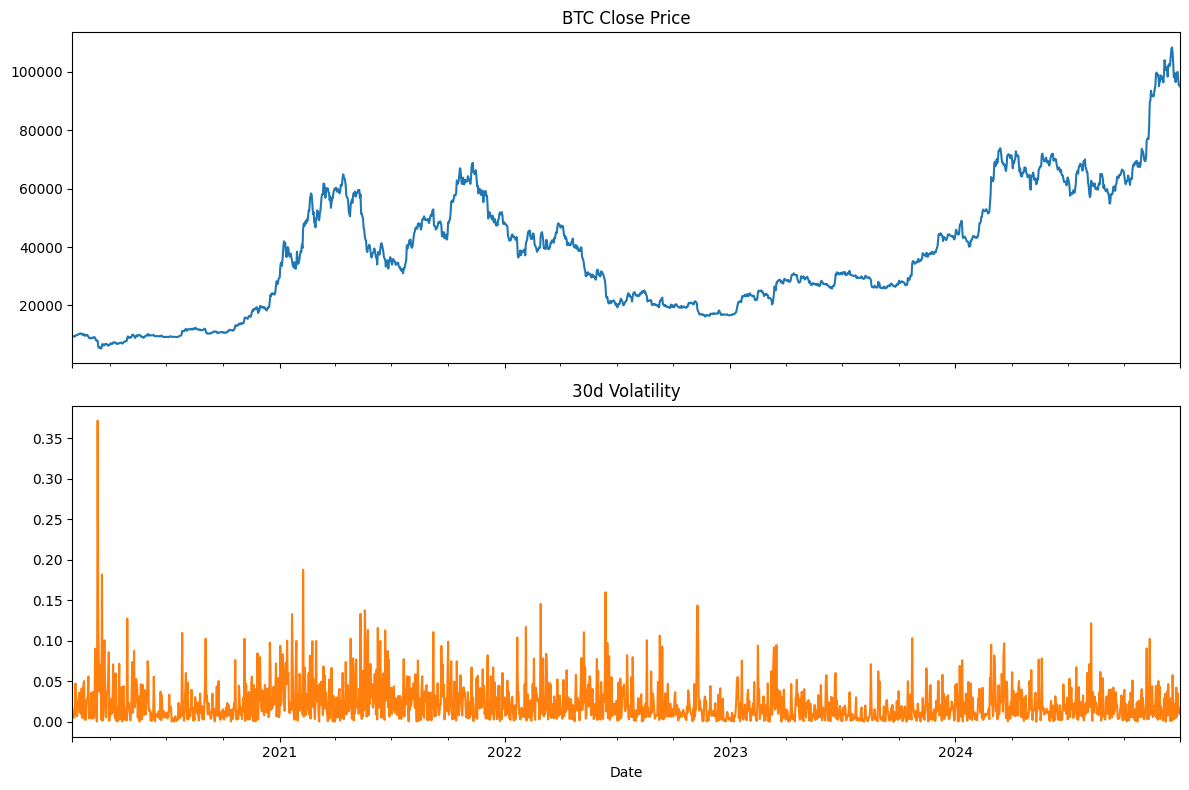

In [4]:
# Plot Close price and 30d volatility if available
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

if 'Close' in btc_data.columns:
    btc_data['Close'].plot(ax=axes[0], color='tab:blue', title='BTC Close Price')
else:
    axes[0].text(0.5, 0.5, 'Close column not found', ha='center', va='center')

if 'Volatility_30d' in btc_data.columns:
    btc_data['Volatility_30d'].plot(ax=axes[1], color='tab:orange', title='30d Volatility')
else:
    axes[1].text(0.5, 0.5, 'Volatility_30d column not found', ha='center', va='center')

plt.tight_layout()
plt.show()


In [10]:
# Load and preview market events
events_csv = project_root / 'data' / 'processed' / 'market_events.csv'
if events_csv.exists():
    events = pd.read_csv(events_csv, parse_dates=['date'])
    print(f"Events data shape: {events.shape}")
    display(events.head(62))
else:
    print(f"No events file found at: {events_csv.resolve()}")


Events data shape: (62, 7)


,date,event,severity,price_impact,year,month,event_id
0,2020-03-12,Bitcoin crashes 50% in COVID Black Thursday,5,negative,2020,3,1
1,2020-07-26,Bitcoin breaks above $10K resistance,3,positive,2020,7,2
2,2020-10-21,Bitcoin rally begins on institutional demand,4,positive,2020,10,3
3,2020-11-30,Bitcoin breaks $19K approaching ATH,4,positive,2020,11,4
4,2020-12-17,Bitcoin breaks $20K all-time high,5,positive,2020,12,5
...,...,...,...,...,...,...,...
57,2024-10-29,Bitcoin surges to $73K pre-election,4,positive,2024,10,58
58,2024-11-06,Bitcoin explodes to $75K on Trump victory,5,positive,2024,11,59
59,2024-11-12,Bitcoin reaches new ATH at $89K,5,positive,2024,11,60
60,2024-11-22,Bitcoin briefly touches $99K approaching $100K,5,positive,2024,11,61
